# Project title: Price model for airbnb listings in Geneva

## Exploratory Data Analysis (EDA)

### Libraries and settings

In [149]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import fnmatch

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


### Import data from SQLite database

In [150]:
# Import listings data from listings.db
conn = sqlite3.connect('listings.db')
df_orig = pd.read_sql_query("SELECT * FROM listings", conn)
df_orig.head()

,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26


In [151]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


## Univariate EDA

### Summary statistics

In [169]:
# summary statistics of numeric variables
df_orig.describe()

,id,lat,lon,price,accommodates,bathrooms,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities
count,2.024000e+03,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,2.992165e+07,46.206284,6.143972,126.394269,2.657115,1.201334,4.615577,4.782021,0.348814,10.613636,0.161067,21.853755
std,1.529775e+07,0.020470,0.027914,134.113890,1.507280,0.497997,0.646705,0.379010,0.476713,25.314198,0.367684,10.491310
min,4.251500e+04,46.138820,5.973220,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.723789e+07,46.195377,6.132483,70.000000,2.000000,1.000000,4.615577,4.782021,0.000000,1.000000,0.000000,14.000000
50%,3.307640e+07,46.204440,6.144230,99.000000,2.000000,1.000000,4.670000,4.782021,0.000000,1.000000,0.000000,20.000000
75%,4.306113e+07,46.212587,6.155158,134.000000,4.000000,1.000000,4.940000,5.000000,1.000000,3.000000,0.000000,28.000000
max,5.069686e+07,46.346590,6.269240,3000.000000,11.000000,6.000000,5.000000,5.000000,1.000000,102.000000,1.000000,71.000000


### Statistical measures (min, max, std, mean, median, count) for price and accomodates

In [153]:
# Price
print('Price:',
      'Count:', round(df_orig.price.count(), 1),
      'Min:', round(df_orig.price.min(), 1),
      'Max:', round(df_orig.price.max(), 1),
      'Mean:', round(df_orig.price.mean(), 1),
      'Median:', round(df_orig.price.median(), 1),
      'Std:', round(df_orig.price.std(), 1))

# Accommodates
print('Accomodates:',
      'Count:', round(df_orig.accommodates.count(), 1),
      'Min:', round(df_orig.accommodates.min(), 1),
      'Max:', round(df_orig.accommodates.max(), 1),
      'Mean:', round(df_orig.accommodates.mean(), 1),
      'Median:', round(df_orig.accommodates.median(), 1),
      'Std:', round(df_orig.accommodates.std(), 1))

Price: Count: 2024 Min: 10.0 Max: 3000.0 Mean: 126.4 Median: 99.0 Std: 134.1
Accomodates: Count: 2024 Min: 1 Max: 11 Mean: 2.7 Median: 2.0 Std: 1.5


### Skewness

In [154]:
df_orig[['price','accommodates']].skew()

price           9.520778
accommodates    1.654079
dtype: float64

### Kurtosis

In [155]:
df_orig[['price','accommodates']].kurtosis()

price           152.575145
accommodates      3.776247
dtype: float64

### Histograms of price and per room_type

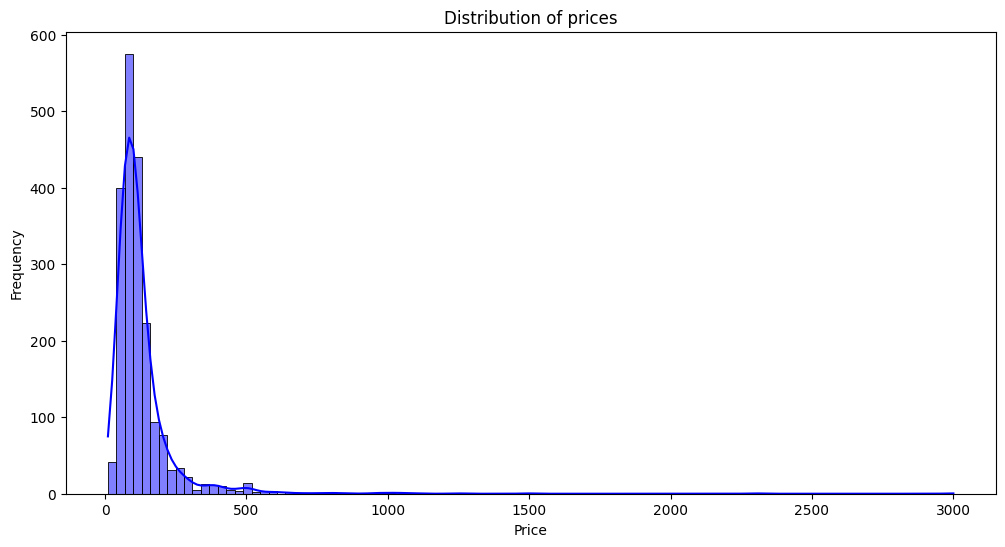

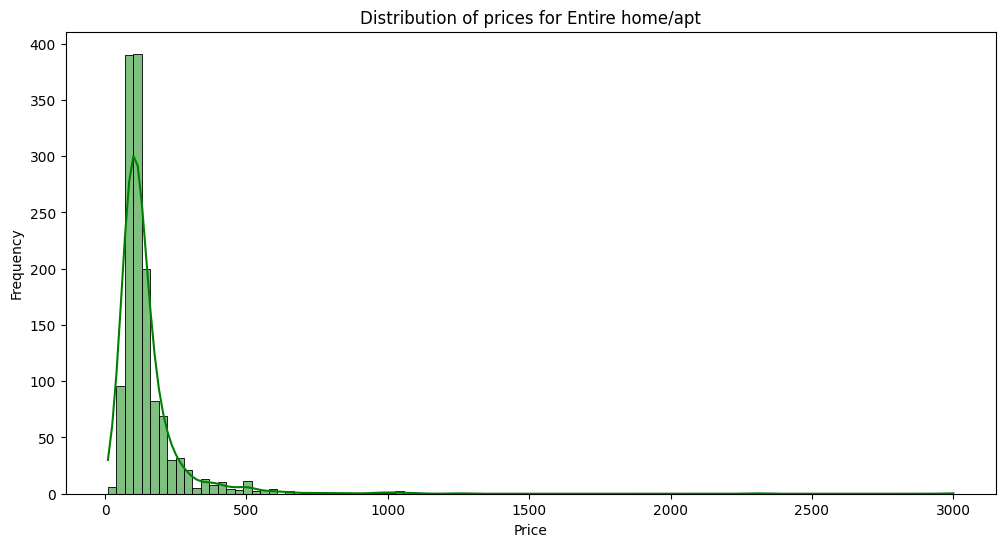

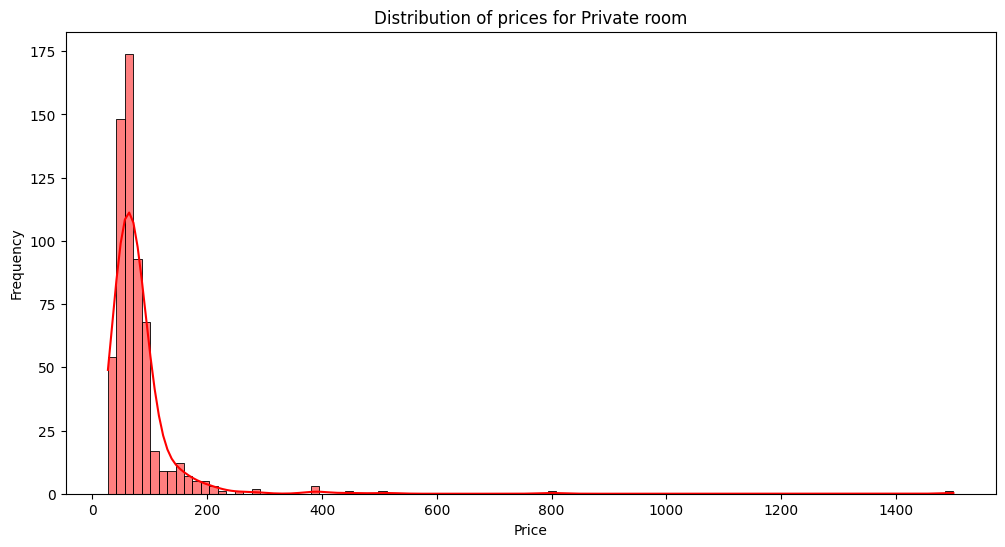

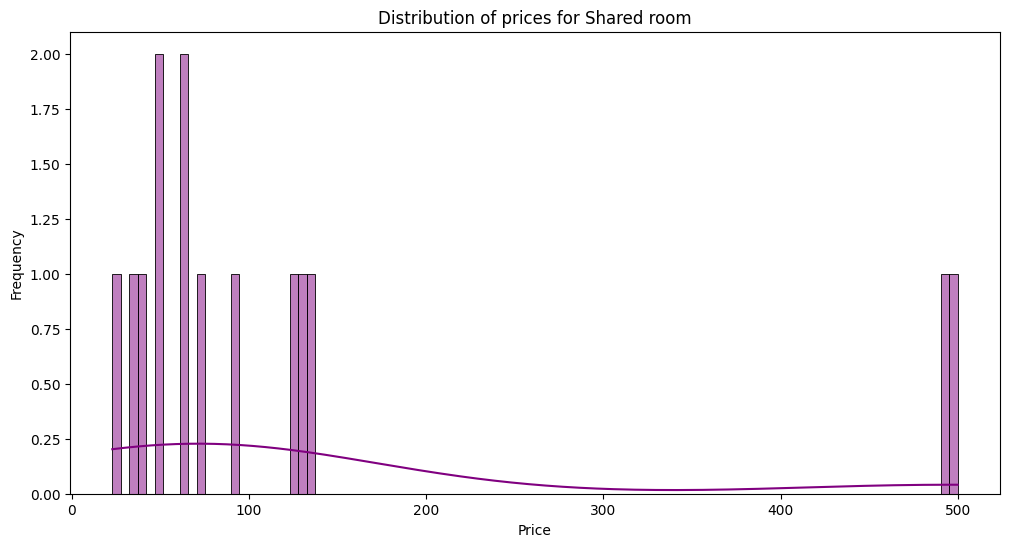

In [168]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
sns.histplot(df_orig['price'], bins=100, color='blue', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Entire home/apt'
plt.figure(figsize=(12, 6))
sns.histplot(df_orig[df_orig['room_type'] == 'Entire home/apt']['price'], bins=100, color='green', kde=True)
plt.title('Distribution of prices for Entire home/apt')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Private room'
plt.figure(figsize=(12, 6))
sns.histplot(df_orig[df_orig['room_type'] == 'Private room']['price'], bins=100, color='red', kde=True)
plt.title('Distribution of prices for Private room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Shared room'
plt.figure(figsize=(12, 6))
sns.histplot(df_orig[df_orig['room_type'] == 'Shared room']['price'], bins=100, color='purple', kde=True)
plt.title('Distribution of prices for Shared room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Create selection based on outliers

In [170]:
# create a subset of the data based on the 0.90 quantiles of the variables price
df = df.loc[df_orig['price'] <= 200]
print(df.shape)

# create a subset of the data with the room_type 'Entire home/apt' & 'Private room'
df = df.loc[(df['room_type'] == 'Entire home/apt') | (df_orig['room_type'] == 'Private room')]

df.describe()

(1815, 15)


,id,lat,lon,price,accommodates,bathrooms,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,num_amenities
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,3.012771e+07,46.205909,6.143270,98.187328,2.455647,1.138017,4.619741,4.776225,0.353719,10.630854,21.459504
std,1.527438e+07,0.020279,0.027755,38.208895,1.250398,0.359297,0.628178,0.393514,0.478255,25.610825,10.173760
min,4.251500e+04,46.138820,5.973220,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.729182e+07,46.195025,6.132120,70.000000,2.000000,1.000000,4.615577,4.780000,0.000000,1.000000,14.000000
50%,3.357660e+07,46.204460,6.143330,95.000000,2.000000,1.000000,4.670000,4.782021,0.000000,1.000000,20.000000
75%,4.322886e+07,46.212455,6.154885,120.000000,3.000000,1.000000,4.930000,5.000000,1.000000,3.000000,28.000000
max,5.069686e+07,46.346590,6.266060,200.000000,11.000000,6.000000,5.000000,5.000000,1.000000,102.000000,69.000000


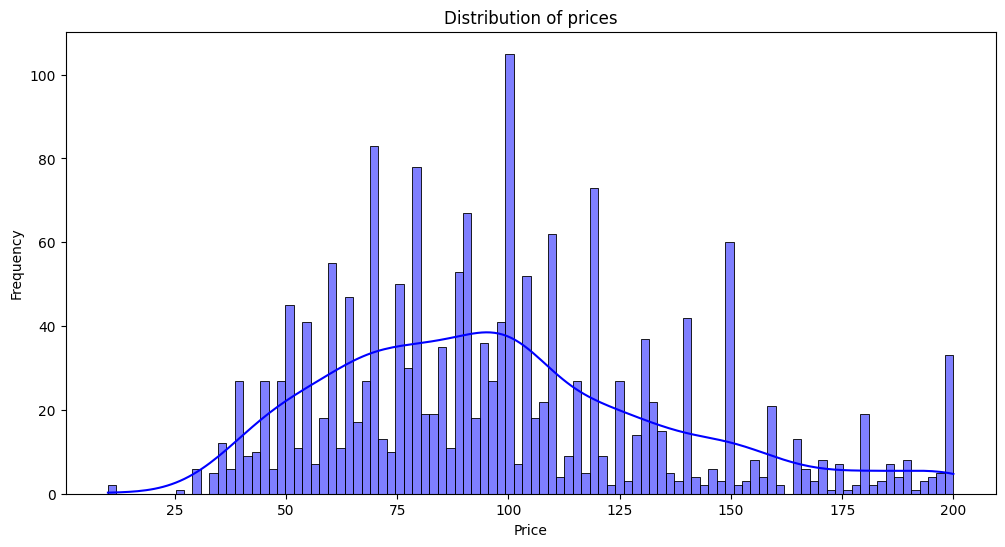

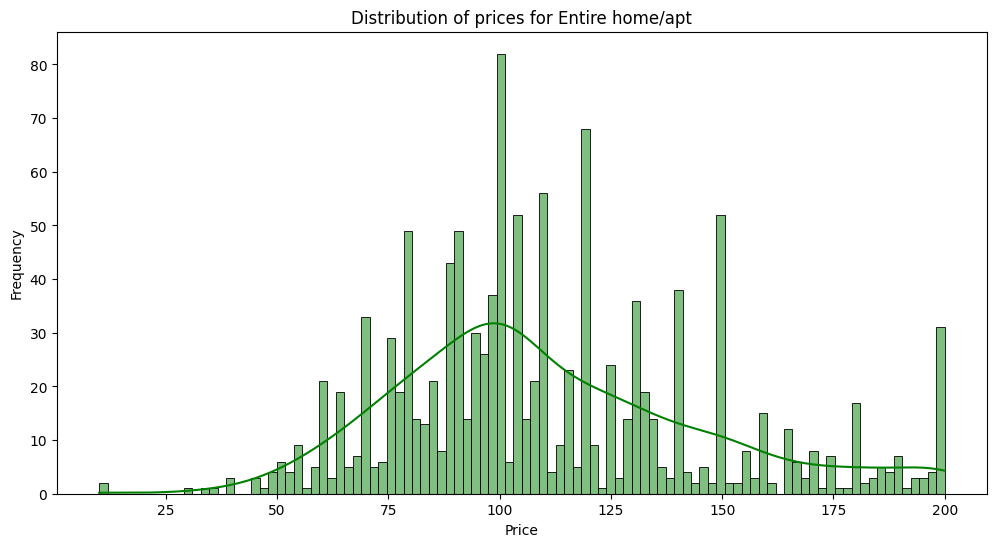

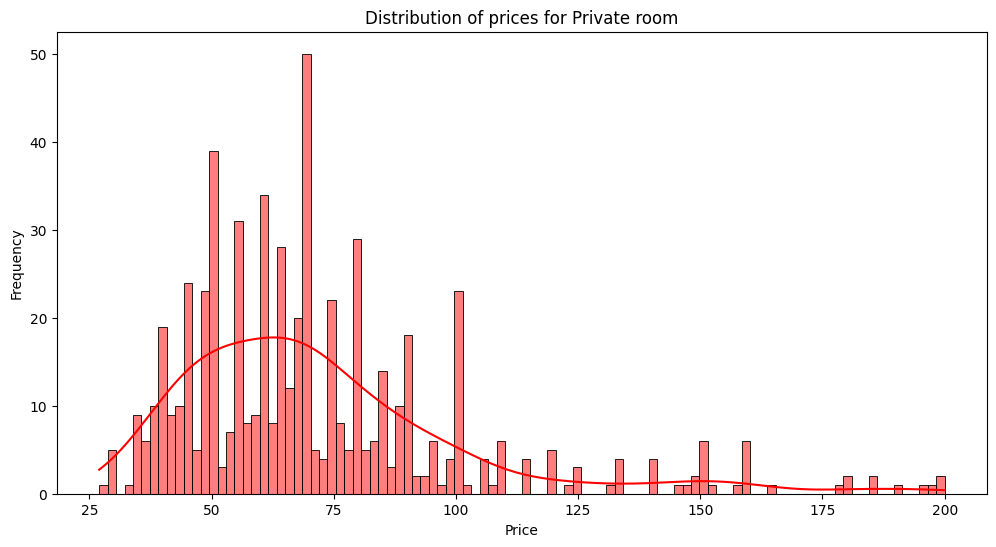

In [158]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, color='blue', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Entire home/apt'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Entire home/apt']['price'], bins=100, color='green', kde=True)
plt.title('Distribution of prices for Entire home/apt')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Private room'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Private room']['price'], bins=100, color='red', kde=True)
plt.title('Distribution of prices for Private room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Neighborhood

In [159]:
# print the number of listings in each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    1241
Other                 384
Carouge                91
Vernier                51
Grand-Saconnex         48
Name: count, dtype: int64


In [160]:
# list the 5 most common neighborhoods and summarize the others as 'Other'
top_5_neighborhoods = neighborhood_counts.head(5).index
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighborhoods else 'Other')
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    1241
Other                 384
Carouge                91
Vernier                51
Grand-Saconnex         48
Name: count, dtype: int64


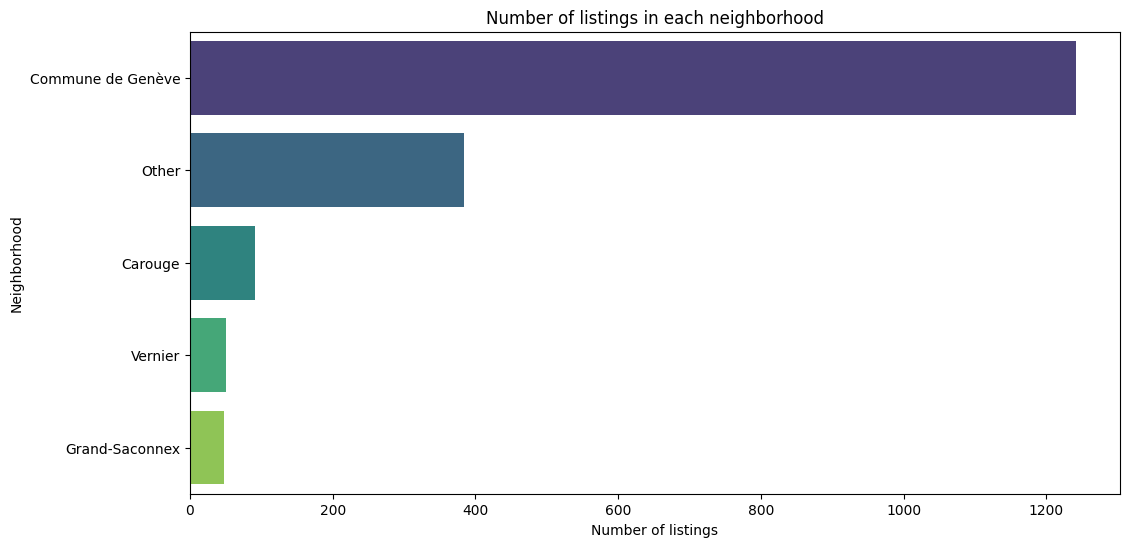

In [161]:
# plot the numnber of the neighbourhood_cleansed column and sort by the number of listings, create a category 'Others' that sums up the listings of neighbourhoods with less than 50 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood_cleansed', order=neighborhood_counts.index, palette='viridis')
plt.title('Number of listings in each neighborhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.show()

### Property types

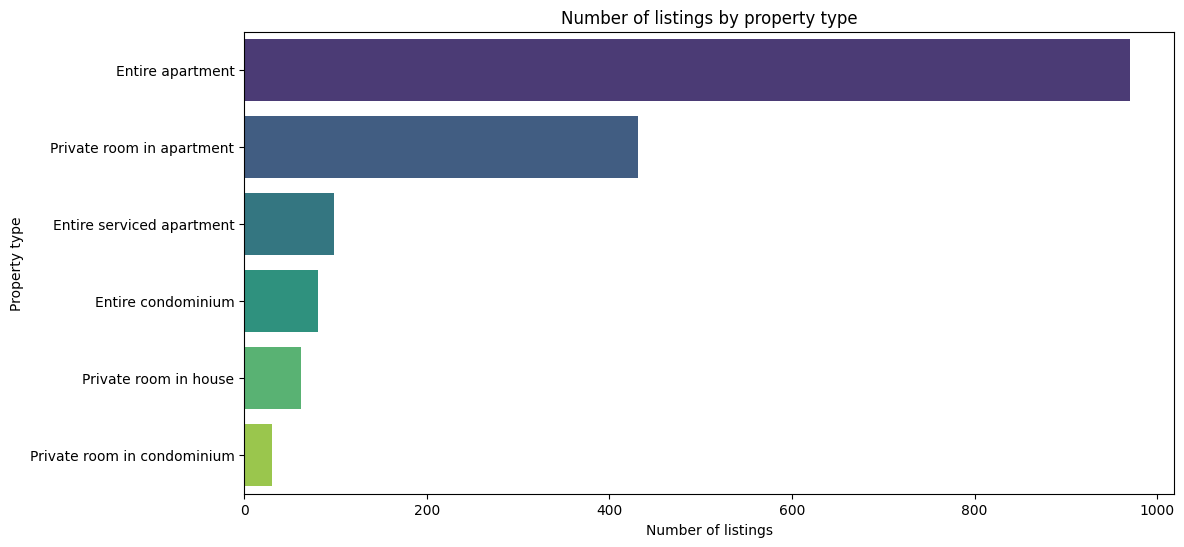

In [162]:
# plot the number of listings depending on the property type and only include property types with more than 25 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts()[df['property_type'].value_counts() > 25].index, palette='viridis')
plt.title('Number of listings by property type')
plt.xlabel('Number of listings')
plt.ylabel('Property type')
plt.show()

### Room types

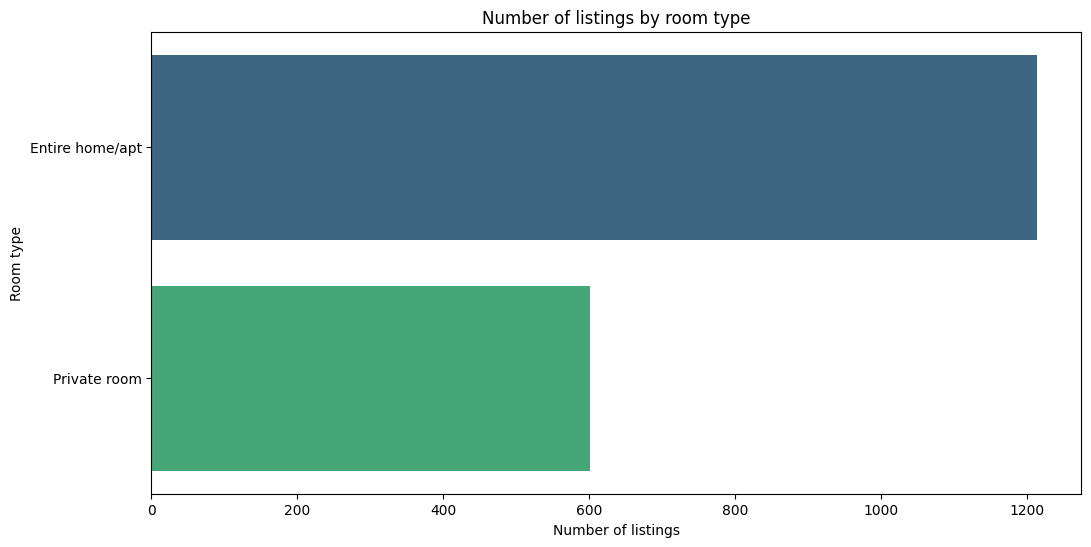

In [163]:
# plot the number of listings depending on the room type and order it by count 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Number of listings by room type')
plt.xlabel('Number of listings')
plt.ylabel('Room type')
plt.show()

### Histogram of 'accomodates'

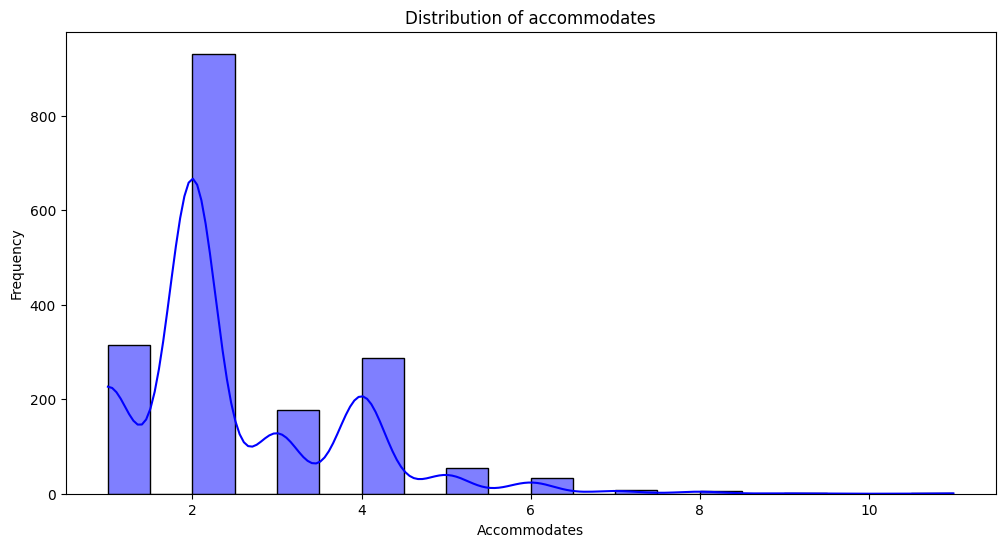

In [164]:
# create a histogram of the number of people that can be accommodated in the listings
plt.figure(figsize=(12, 6))
sns.histplot(df['accommodates'], bins=20, color='blue', kde=True)
plt.title('Distribution of accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()

## Multivariate EDA

### Pivot tables

In [165]:
# Using pivot_table to reshape the data and calculate means
pivot_table = df.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='price', aggfunc=np.mean)


In [166]:
pd.pivot_table(df[['neighbourhood_cleansed', 'room_type', 'price', 'accommodates', 'review_scores_rating', 'instant_bookable', 'num_amenities', 'lake_access']],
               index=['neighbourhood_cleansed', 'room_type'],
               values=['price', 'accommodates', 'review_scores_rating', 'instant_bookable', 'num_amenities', 'lake_access'],
               aggfunc=(np.mean, 'count'))

KeyError: "['lake_access'] not in index"

### Correlation matrix

In [127]:
corr = df[['accommodates', 
          'num_amenities', 
          'price', 
          'review_scores_rating',
          'review_scores_location',
          'bathrooms']].cov().corr()
corr

,accommodates,num_amenities,price,review_scores_rating,review_scores_location,bathrooms
accommodates,1.000000,0.108292,0.997220,0.909268,0.973338,0.995256
num_amenities,0.108292,1.000000,0.057503,0.372047,0.147580,0.161356
price,0.997220,0.057503,1.000000,0.904109,0.978578,0.991369
review_scores_rating,0.909268,0.372047,0.904109,1.000000,0.949929,0.913459
review_scores_location,0.973338,0.147580,0.978578,0.949929,1.000000,0.967197
bathrooms,0.995256,0.161356,0.991369,0.913459,0.967197,1.000000


In [128]:
# the number of listings that have lake access as an amenity
lake_access = df['amenities'].apply(lambda x: 'Lake access' in x)
lake_access.sum()


np.int64(283)

In [129]:
# search and find all amenities with the keyword 'pool' and 'lake'
pool = df['amenities'].apply(lambda x: 'Pool' in x)
lake = df['amenities'].apply(lambda x: 'Lake' in x)
pool.sum(), lake.sum()


(np.int64(38), np.int64(283))